# mini-batch 的实现

Creating pickle file ...
Done!
train acc,test acc | 0.10218333333333333, 0.101
train acc,test acc | 0.7942333333333333, 0.7997
train acc,test acc | 0.8761333333333333, 0.8798
train acc,test acc | 0.89845, 0.9011
train acc,test acc | 0.9075333333333333, 0.9104
train acc,test acc | 0.9148166666666666, 0.9175
train acc,test acc | 0.91975, 0.9223
train acc,test acc | 0.9246166666666666, 0.9265
train acc,test acc | 0.9274, 0.9286
train acc,test acc | 0.9318, 0.9339
train acc,test acc | 0.93465, 0.9361
train acc,test acc | 0.93755, 0.9382
train acc,test acc | 0.9394333333333333, 0.9403
train acc,test acc | 0.94125, 0.9413
train acc,test acc | 0.9439, 0.9433
train acc,test acc | 0.94525, 0.9458
train acc,test acc | 0.9461833333333334, 0.9461


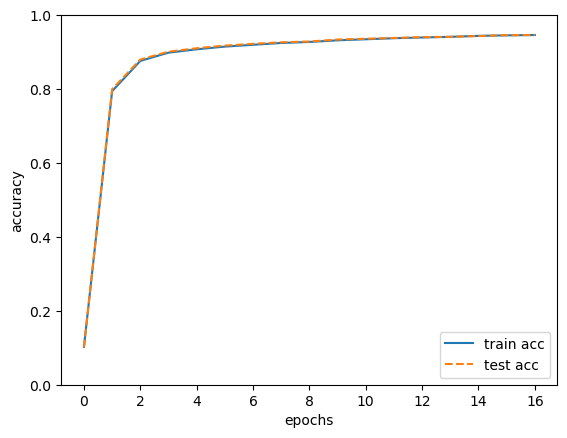

In [1]:
import sys,os
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
import matplotlib.pyplot as plt
#from dataset.minist import load mnist
#from two_layer_net import TwoLayerNet
%run ../dataset/mnist.ipynb
%run ./two_layer_net.ipynb
# 读入数据
(x_train,t_train),(x_test,t_test) = load_mnist(normalize = True, one_hot_label=True)

network = TwoLayerNet(input_size=784,hidden_size=50,output_size=10)

iters_num = 10000 # 适当设定循环的次数
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size/batch_size,1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    # 计算梯度
    # grad = network.numerical_gradient(x_batch,t_batch)
    grad = network.gradient(x_batch,t_batch)
    
    # 更新参数
    for key in ('W1','b1','W2','b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch,t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train,t_train)
        test_acc = network.accuracy(x_test,t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc,test acc | " + str(train_acc) + ", " + str(test_acc))
    
# 绘制图形
markers = {'train': 'o','test':'s'}
x = np.arange(len(train_acc_list))
plt.plot(x,train_acc_list, label = 'train acc')
plt.plot(x,test_acc_list, label = 'test acc',linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0,1.0)
plt.legend(loc='lower right')
plt.show()